# Einführung in nbinteract

### 1.) Erstellen eines Git Accounts und eines Reposetories 

Gehen sie auf https://github.com/ und erstellen sie sich ein Account sowie ein Reposetory.

Benennen wir das Repo als "wmd"

    - Das Repo muss aud Public stehen 
    - Das Repo muss mit einer README initialisiert werden

Nachfolgend ist in die Einstellungen des Repos zu sehen

<img style="float: left;" src="./PIC/image.png" >






### 2.) Initialisieren des Reposetories auf mybinder.org

Gehen sie auf  http://mybinder.org/ und initialisieren sie ihr Reposetory.
Geben sie hierzu den Pfad ihres Gits ein



<img style="float: left;" src="./PIC/image2.PNG"  width="400" >


Nachfolgend öffnet der Binder Server eine Jupyter Notebook Fenster in dem sie den Ihr Aotebook online ohne offline Installation von Jupyter Notebook benötigen 

In diesem Beispiel betrachten wir jedoch die Verwendung mit einem offline am PC intsalliertn Jupyter Notebook 

### 3.) Clonen des Reposetories (local)

Hierzu sollten sie zunächst ihr Reposetory local clonen. Öffnen sie ein Terminal (z.B. Anaconda Prompt Shell).  

Hinweis: Sollten sie noch nie mit Git gearbeitet haben sollten sie zunächst Git im Terminal installieren. 

Im Fall von Anaconda: 

```terminal
conda install -c anaconda git
```

Nachfolgenden können Sie die das Repo in ihren gewünschten Ordner clonen

```terminal
# Clone the repo
{your folder}: git clone https://github.com/{username}/wmd
# Move into the repo directory
cd wmd
# Start Jupyter
jupyter notebook
```

### 4.) Installieren und Initialisieren von nbinteract 

Gehen sie wieder in das locale Terminal. Hier ab besten das Terminal in Jupyter drirekt



<img style="float: center;" src="./PIC/image3.PNG"  width="300" >


Installieren sie nbinteract:

```
pip install nbinteract
```

Gehen sie im Terminal nun in den Ordner in dem sich auch das Repo befindet
(über cd {yourpath})

Initialisieren sie nun ihr Verzeichnismit folgender Eingabe:

# Initializes nbinteract.
nbinteract init

git add -A
git commit -m "Setup nbinteract"
git push origin master

Nun sollte sich in ihrem localen Verzeichnis eine requirements.txt  erstellt haben in dieser sollten sie alle benutzen pakete eintragen z.b. numpy

# Erstellen eines ersten Notebooks

Zunächst erstellen wir eine Notebook was interaktiv auf die Eingabe der Benutzer reagiert. Hierzu gibt es ein generelles vorgehen.
    - Import aller benötigten Pakete 
    - Erstellung von Funktionen die später interaktiv in der Html Seite aus-geführt werden sollen 
    - Aufruf der geeigneten Eingabemethode
    
#### IMPORT    
 

In [22]:
from ipywidgets import interact
import nbinteract as nbi

### BSP 1:  Flächenberechnung mittels Schieberegler   

Wir wollen berechnen 

$$A=a*b$$
<div>
<img style="float: center;" src="./PIC/image4.PNG" width="300" >
</div>    

#### Erstellen der Funktion mittels def

In [23]:
def square(a,b):
    return 'Die Fläche A beträgt {} m^2'.format(a * float(b))

#### Erstellen der Eingabemaske 2 Beispiele

In [24]:
# nbi:left
interact(square, a=(0,100,5),b='1.5');


interactive(children=(IntSlider(value=50, description='a', step=5), Text(value='1.5', description='b'), Output…

In [25]:
# nbi:right
interact(square, a=(0,100,5),b={'One': 1, 'Five': 5, 'Ten': 10});

interactive(children=(IntSlider(value=50, description='a', step=5), Dropdown(description='b', options={'One': …

### BSP 1:  Funktion Plotten mittels Schieberegler   

Wir wollen berechnen 

$$f(x)=a\cdot x+b$$ 

oder 

$$f(x)=a\cdot x^2+b*x + c$$ 

und anschließend plotten 

#### Einbinden des Matplotlib paketes 

Hinweis: Binden sie das Paket auch in die requierements.txt ein --> hier einfach ''matplotlib'' eintragen

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

#### Erstellen der Funktion

In [27]:
def lin(a,b,x):
    return a*x+b
def quad(a,b,c,x):
    return a*x**2+b*x+c

#### Erstellen der Plot funktion

In [28]:
def funk_plot(Bereich,Funktion,a,b,c=0):
    x=np.zeros(int(Bereich)*100)
    y=np.zeros(int(Bereich)*100)
    for i in range(0,int(Bereich)*100):
        x[i]=i/100
        if Funktion =='Linear':
            y[i]=lin(a,b,x[i])
            title='Lineare'
            label='$f(x)=$'+str(a)+'$\cdot x+$'+str(b)
        if Funktion =='Quadratisch':
            y[i]=quad(a,b,c,x[i])
            title='Quadratische'
            label='$f(x)=$'+str(a)+'$\cdot x^2+$'+str(b)+'$\cdot x+$'+str(c)
           
    plt.plot(x,y, label=r'Funktion: '+label)
    plt.title(title+'-Funktion') 
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.grid()
    plt.show()


### Testen der beiden Funktion (statisch)

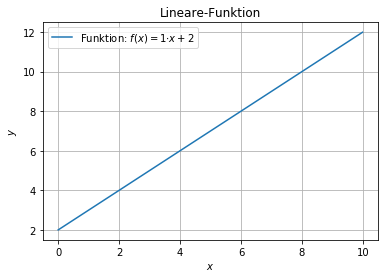

In [29]:
funk_plot(10,'Linear',1,2)

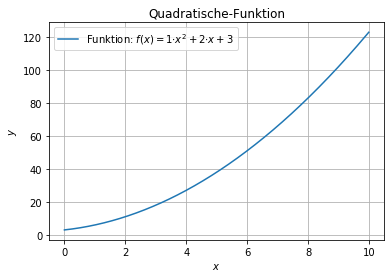

In [30]:
funk_plot(10,'Quadratisch',1,2,3)

### Erstellen der Interaktiven Funktionen

In [31]:

interact(funk_plot,a=(0,100,5),b=(0,100,5),c=(0,100,5),Bereich='10',Funktion={'Quadratisch','Linear'})

interactive(children=(Text(value='10', description='Bereich'), Dropdown(description='Funktion', options=('Line…

<function __main__.funk_plot(Bereich, Funktion, a, b, c=0)>

## Versteckte Funktionen in gesonderten Datein

Um eine übersuchtliche Seite zu erstellen gliedern wir Funktionben aus und speichern Sie in eine gesonderte *.py* Datei ab um sie später für interaktive felder zu nutzen.

Die Idee:

Wir möchen Nachfolgenden Code (Funktion und Sinn irrelevant) komplett auserhalb des Notebooks laufen lassen aber die Ausgabe mit variabel einzustellenden Werten innerhallb des Notebooks haben.



In [32]:
import random as rd
from numpy import sqrt,zeros
from matplotlib.pyplot import plot,close

close
def huge_plot(E=70000,SIG_Y=300 ,v=0.3,eta_min=-0.005,eta_max=0.005,NC=500):
    eta_min=float(eta_min)
    eta_max=float(eta_max)
    G=float(E)/(2.*(1+v))
    SIG_R_1=zeros(NC)
    SIG_G_1=zeros(NC)
    SIG_R_2=zeros(NC)
    SIG_G_2=zeros(NC)
    for i in range(1,NC):
       EPS_XX=rd.uniform(eta_min,eta_max)
       EPS_YY=rd.uniform(eta_min,eta_max)
       GAM_XY=rd.uniform(eta_min,eta_max)
       SIG_XX=(E/(1-v**2))*(EPS_XX+v*EPS_YY)
       SIG_YY=(E/(1-v**2))*(EPS_YY+v*EPS_XX)
       TAU_XY=G*GAM_XY    
       SIG_1=((SIG_XX+SIG_YY)/2)+sqrt(((SIG_XX-SIG_YY)/2)**2+TAU_XY**2)
       SIG_2=((SIG_XX+SIG_YY)/2)-sqrt(((SIG_XX-SIG_YY)/2)**2+TAU_XY**2)
       SIG_v3=sqrt(0.5*((SIG_1-SIG_2)**2+SIG_1**2+SIG_2**2))
       f=SIG_v3-SIG_Y   
       if f<0:
           SIG_G_1[i]=SIG_1
           SIG_G_2[i]=SIG_2
       elif f>0: 
           SIG_R_1[i]=SIG_1
           SIG_R_2[i]=SIG_2       
    plot(SIG_G_1,SIG_G_2,'go')
    plot(SIG_R_1,SIG_R_2,'ro')  
    plot(-SIG_G_1,-SIG_G_2,'go')
    plot(-SIG_R_1,-SIG_R_2,'ro')     

In [33]:
interact(huge_plot,eta_min='-0.005',eta_max='0.005')

interactive(children=(IntSlider(value=70000, description='E', max=210000, min=-70000), IntSlider(value=300, de…

<function __main__.huge_plot(E=70000, SIG_Y=300, v=0.3, eta_min=-0.005, eta_max=0.005, NC=500)>

In [40]:
%run hiddencode.py

interact(huge_plot_2,eta_min='-0.005',eta_max='0.005')

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=70000, description='E', max=210000, min=-70000), IntSlider(value=300, de…

<function __main__.huge_plot_2(E=70000, SIG_Y=300, v=0.3, eta_min=-0.005, eta_max=0.005, NC=500)>